In [ ]:
!gdown 1aEF3-x_xrX2JAIPu0puzf1JL3aiaqbul

Downloading...
From: https://drive.google.com/uc?id=1aEF3-x_xrX2JAIPu0puzf1JL3aiaqbul
To: /content/bestsellers with categories.csv
100% 51.2k/51.2k [00:00<00:00, 16.3MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.shape

(550, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Limpieza y preparación de datos

Valores nulos

<Axes: >

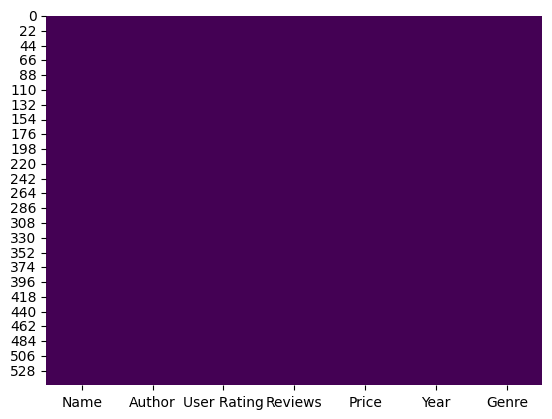

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

No hay valores nulos por lo que no se realizan cambios

Valores valores Na

<Axes: >

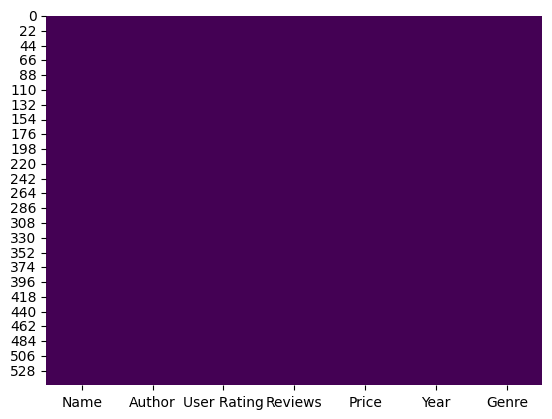

In [ ]:
sns.heatmap(df.isna(),cbar=False,cmap='viridis')

No hay valores NA por lo que no se realizan cambios

**Datos duplicados**

In [ ]:
text_duplicate = df[df.duplicated(subset='Name')]
text_duplicate

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Existen datos duplicados pero no se realizaron cambios ya que aunque los nombres estén repetidos es normal porque un libro puede tener varias versiones.

In [ ]:
df.Name.unique().shape

(351,)

In [ ]:
df.Name.unique().shape[0]-text_duplicate.Name.unique().shape[0]

255

# Entendimiento de los datos

# Distribución de las variables numéricas

Text(0.5, 1.0, 'Frecuencia de ratings')

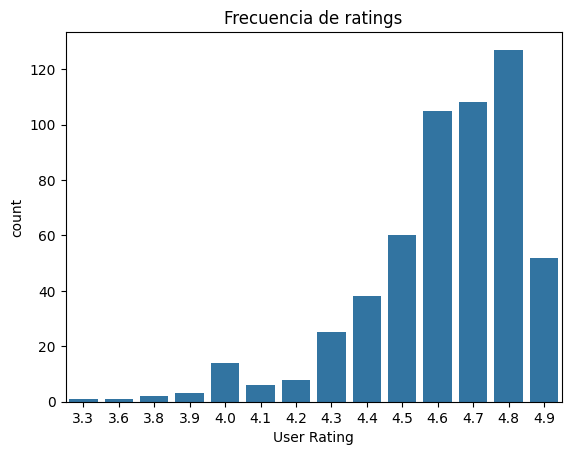

In [ ]:
sns.countplot(x='User Rating', data=df)
plt.title("Frecuencia de ratings")

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64


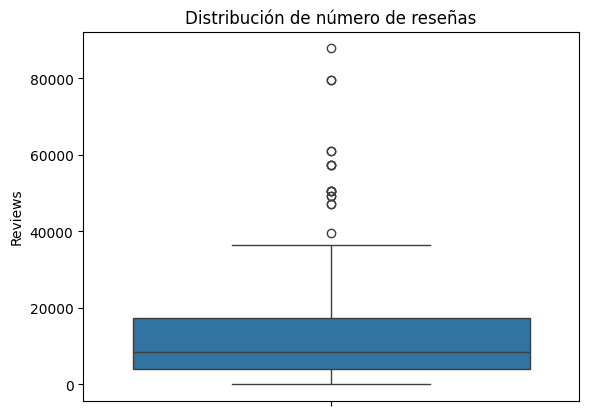

In [ ]:
sns.boxplot(y=df['Reviews'])
plt.title("Distribución de número de reseñas")
print(df['Reviews'].describe())

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64


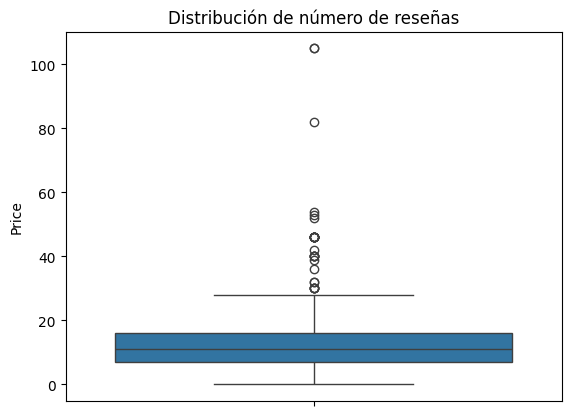

In [ ]:
sns.boxplot(y=df['Price'])
plt.title("Distribución de número de reseñas")
print(df['Price'].describe())

# Distribución las variables categoricas

In [ ]:
df['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

/tmp/ipython-input-57-2182877656.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = genre_counts[i]


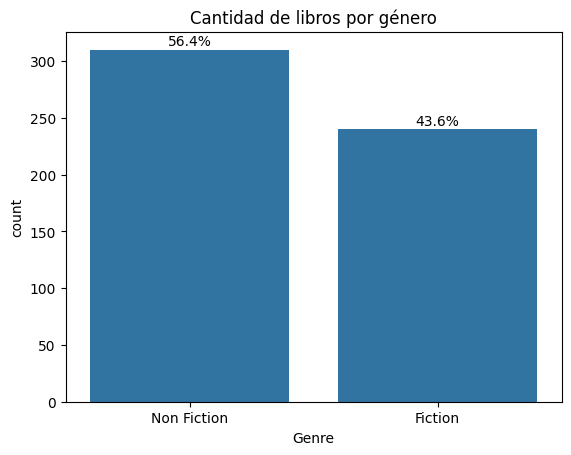

In [ ]:
genre_counts = df['Genre'].value_counts(normalize=True) * 100

sns.countplot(data=df, x='Genre')
plt.title("Cantidad de libros por género")

# Agregar porcentajes encima
for i, count in enumerate(df['Genre'].value_counts()):
    pct = genre_counts[i]
    plt.text(i, count + 1, f"{pct:.1f}%", ha='center', va='bottom')

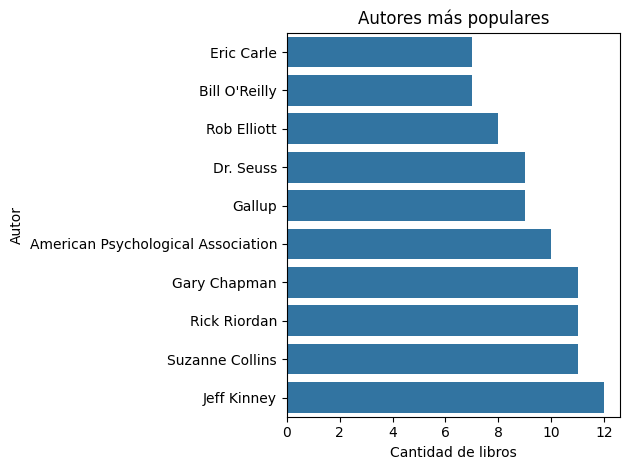

In [ ]:
top_authors = df['Author'].value_counts().head(10).sort_values()

sns.barplot(x=top_authors.values, y=top_authors.index)

plt.title("Autores más populares")
plt.xlabel("Cantidad de libros")
plt.ylabel("Autor")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Libros más repetidos en el Top 50')

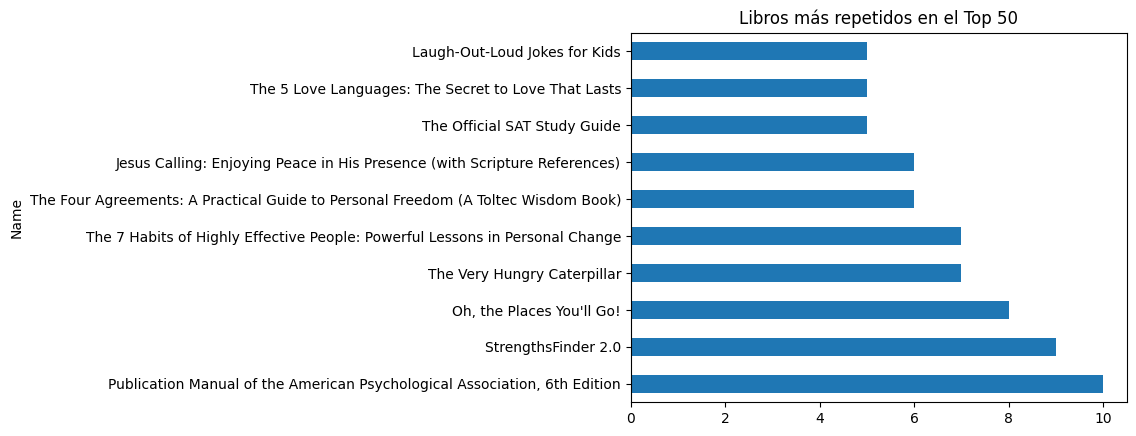

In [ ]:
df['Name'].value_counts().head(10).plot(kind='barh')
plt.title("Libros más repetidos en el Top 50")

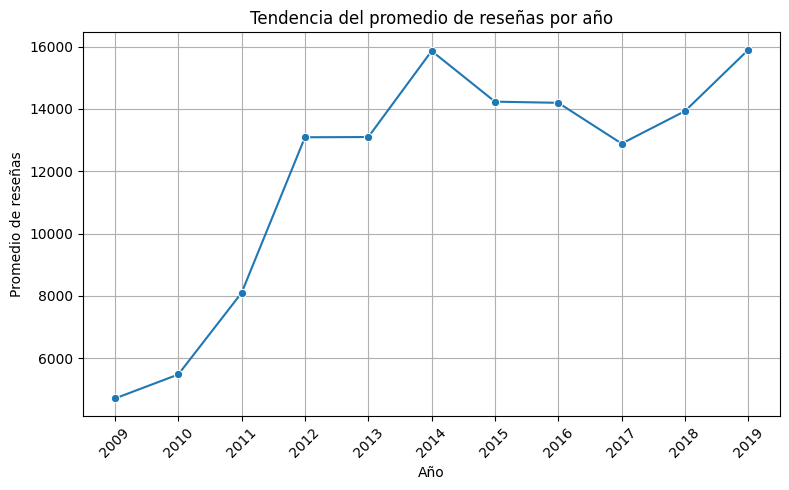

In [ ]:
# Agrupar por año y calcular promedio de reseñas
reviews_by_year = df.groupby('Year')['Reviews'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=reviews_by_year, x='Year', y='Reviews', marker='o')

plt.title("Tendencia del promedio de reseñas por año")
plt.ylabel("Promedio de reseñas")
plt.xlabel("Año")

# Mostrar todos los años en el eje x
plt.xticks(ticks=reviews_by_year['Year'], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


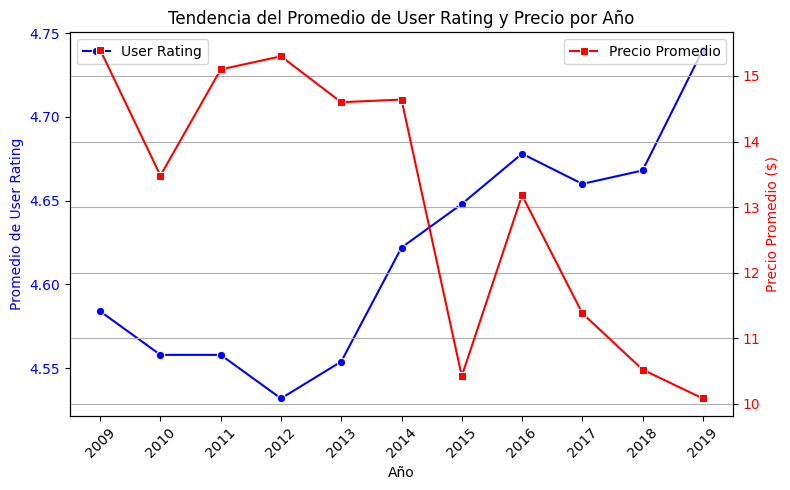

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por año y calcular promedios
reviews_by_year = df.groupby('Year').agg({
    'User Rating': 'mean',
    'Price': 'mean'
}).reset_index()

# Crear la figura y el primer eje (para User Rating)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primer eje: User Rating
sns.lineplot(data=reviews_by_year, x='Year', y='User Rating', marker='o', ax=ax1, label="User Rating", color='blue')
ax1.set_ylabel("Promedio de User Rating", color='blue')
ax1.set_xlabel("Año")
ax1.tick_params(axis='y', labelcolor='blue')

# Segundo eje: Precio
ax2 = ax1.twinx()
sns.lineplot(data=reviews_by_year, x='Year', y='Price', marker='s', ax=ax2, label="Precio Promedio", color='red')
ax2.set_ylabel("Precio Promedio ($)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Mostrar todos los años en el eje x
ax1.set_xticks(reviews_by_year['Year'])
ax1.set_xticklabels(reviews_by_year['Year'], rotation=45)

# Títulos y diseño
plt.title("Tendencia del Promedio de User Rating y Precio por Año")
fig.tight_layout()
plt.grid(True)
plt.show()


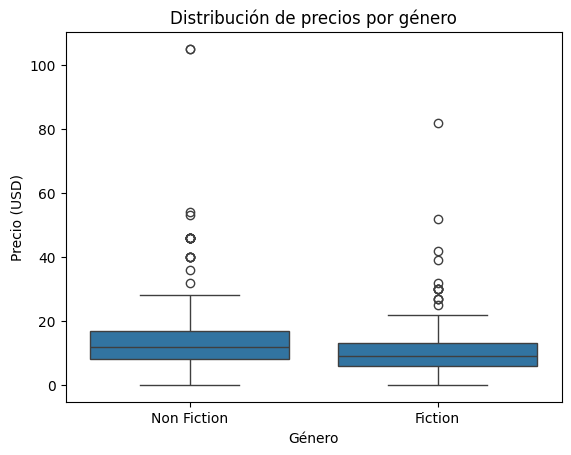

In [ ]:
sns.boxplot(data=df, x='Genre', y='Price')
plt.title("Distribución de precios por género")
plt.xlabel("Género")
plt.ylabel("Precio (USD)")
plt.show()

# Hipótesis

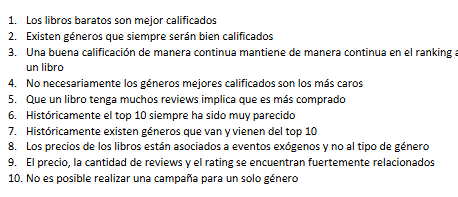

Hipótesis 1

<Axes: xlabel='Price', ylabel='User Rating'>

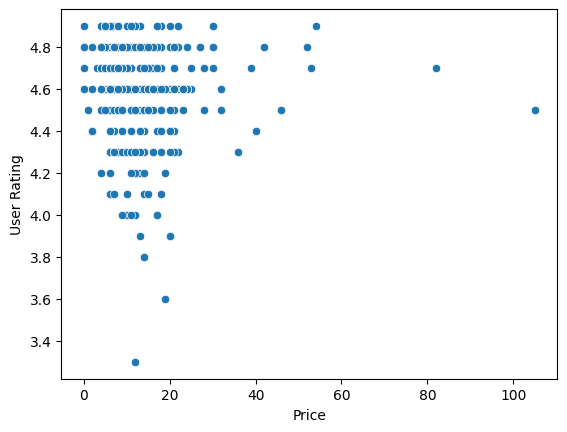

In [ ]:
#1 Si bien visualmente no se logra apreciar la relación,
sns.scatterplot(x=df['Price'],y=df['User Rating'])

In [ ]:
from scipy.stats import spearmanr
import numpy as np

# log_price = np.log(df['Price'] + 1)
rho, pval = spearmanr(df['Price'] , df['User Rating'], nan_policy='omit')
print(f"Spearman ρ = {rho:.3f}, p‑value = {pval:.3f}")


Spearman ρ = -0.231, p‑value = 0.000


In [ ]:
log_price.isna().sum()


np.int64(0)

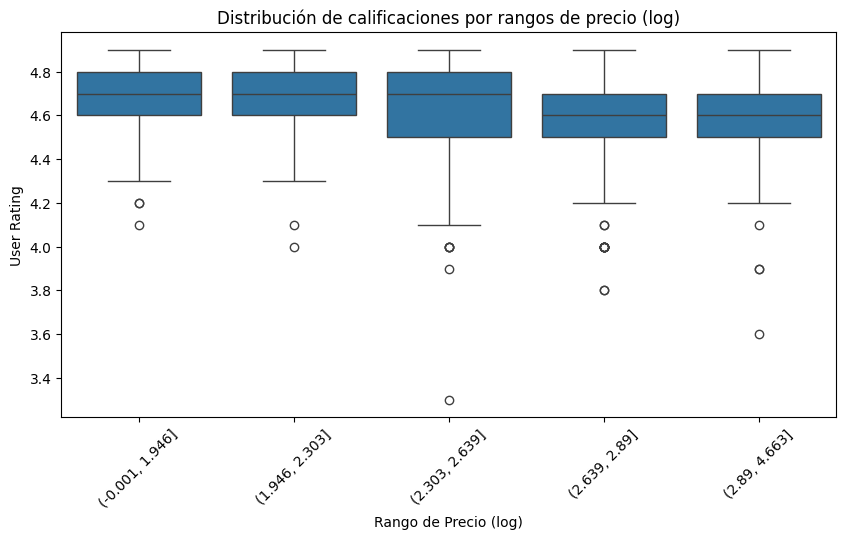

In [ ]:
df = df[df['Price'] > 0].copy()

#C olumna logarítmica
df['log_price'] = np.log(df['Price'])

df['price_bin'] = pd.qcut(log_price, q=5)  # quintiles

plt.figure(figsize=(10, 5))
sns.boxplot(x='price_bin', y='User Rating', data=df)
plt.xticks(rotation=45)
plt.title("Distribución de calificaciones por rangos de precio (log)")
plt.xlabel("Rango de Precio (log)")
plt.ylabel("User Rating")
plt.show()


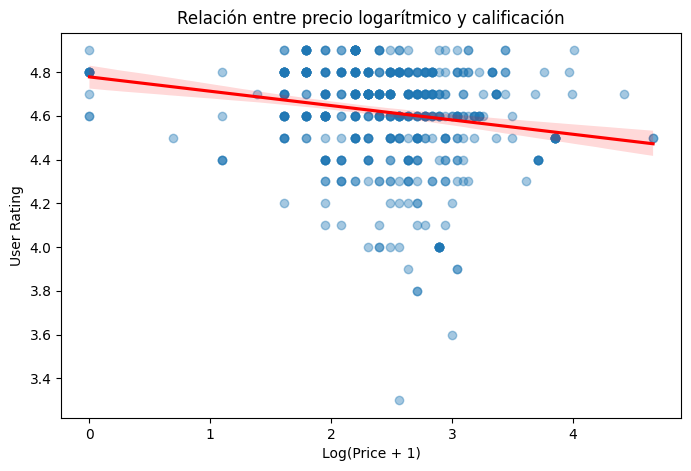

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_price = np.log(df['Price'] + 1)

plt.figure(figsize=(8, 5))
sns.regplot(x=log_price, y=df['User Rating'], scatter_kws={'alpha':0.4}, line_kws={"color": "red"})
plt.xlabel("Log(Price + 1)")
plt.ylabel("User Rating")
plt.title("Relación entre precio logarítmico y calificación")
plt.show()


Hipótesis 2

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


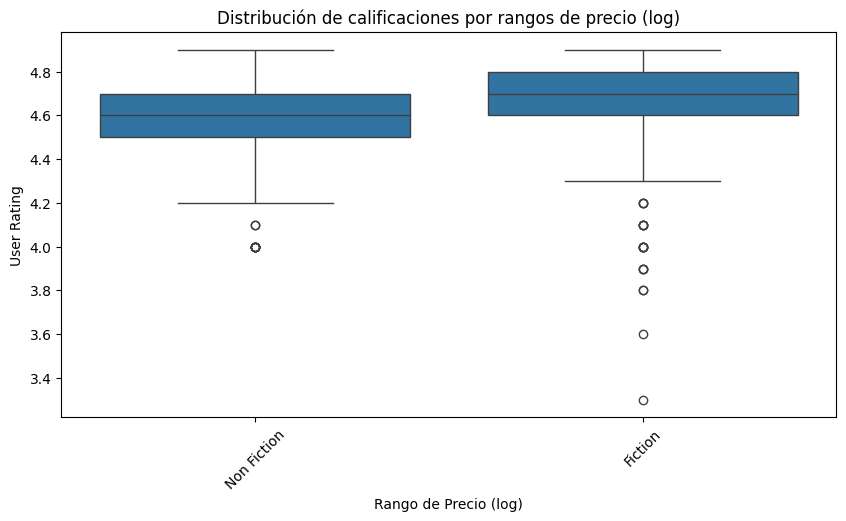

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Genre', y='User Rating', data=df)
plt.xticks(rotation=45)
plt.title("Distribución de calificaciones por genero")
plt.xlabel("Rango de Precio (log)")
plt.ylabel("User Rating")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Hipótesis 3

In [ ]:
#3.
text_duplicate.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction
48,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
51,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2010,Non Fiction
52,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2011,Non Fiction
57,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction


In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
terciles = pd.qcut(df['Price'], q=3, retbins=True)
print("Límites de los terciles:", terciles[1])


Límites de los terciles: [  0.   8.  14. 105.]


In [ ]:
# Agrupamos por 'Name' y contamos cuántos años distintos aparece
book_years = df.groupby('Name')['Year'].nunique().reset_index()
book_years.columns = ['Name', 'Years_in_ranking']


In [ ]:
book_rating = df.groupby('Name')['User Rating'].mean().reset_index()
book_rating.columns = ['Name', 'Avg_Rating']


In [ ]:
books_summary = pd.merge(book_years, book_rating, on='Name')


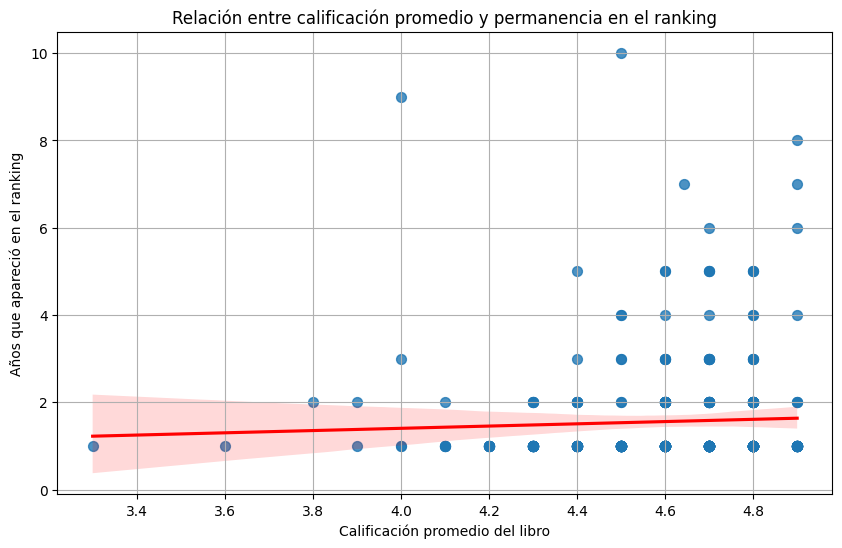

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Avg_Rating',
    y='Years_in_ranking',
    data=books_summary,
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)

plt.title("Relación entre calificación promedio y permanencia en el ranking")
plt.xlabel("Calificación promedio del libro")
plt.ylabel("Años que apareció en el ranking")
plt.grid(True)
plt.show()


In [ ]:
correlation = books_summary['Avg_Rating'].corr(books_summary['Years_in_ranking'])
print(f"Correlación entre rating y años en ranking: {correlation:.3f}")

Correlación entre rating y años en ranking: 0.047


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.Reviews.unique().shape

(346,)

In [ ]:
df.Name.unique().shape

(351,)

In [ ]:
df.groupby(['Name'])['User Rating'].nunique().reset_index(name='distinct_reviews').sort_values('distinct_reviews', ascending=False)


,Name,distinct_reviews
219,The 7 Habits of Highly Effective People: Power...,2
239,The Elegance of the Hedgehog,1
238,"The Dukan Diet: 2 Steps to Lose the Weight, 2 ...",1
237,The Day the Crayons Quit,1
236,The Daily Show with Jon Stewart Presents Earth...,1
...,...,...
113,"Happy, Happy, Happy: My Life and Legacy as the...",1
112,Hamilton: The Revolution,1
111,Guts,1
110,Grey: Fifty Shades of Grey as Told by Christia...,1


In [ ]:
df[df['Name'] == 'The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change']

,Name,Author,User Rating,Reviews,Price,Year,Genre
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2009,Non Fiction
332,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2011,Non Fiction
333,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2012,Non Fiction
334,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2013,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2016,Non Fiction
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction
